In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = make_regression(n_samples=5000 , n_features=3)

In [5]:
data

(array([[ 3.08230108e-01, -1.14498096e+00, -4.22709205e-01],
        [ 6.80298884e-04,  3.76395316e-01, -9.88438704e-01],
        [-2.53211653e-01, -3.87550889e-01,  3.60308541e-01],
        ...,
        [ 5.72550242e-01,  3.19114085e-01,  3.02726817e-01],
        [-8.68782974e-02,  1.87532735e+00, -6.98142714e-01],
        [ 1.00330821e+00,  1.68628407e+00,  2.25197003e+00]]),
 array([-60.47052418, -56.41437346,   3.12832918, ...,  52.02266328,
         14.74901625, 253.1690869 ]))

In [6]:
x = data[0]

In [7]:
y = data[1]

In [9]:
x.shape

(5000, 3)

In [10]:
y.shape

(5000,)

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [14]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [56]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(3 , )),
        tf.keras.layers.Dense(units=265 , activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=128 , activation='relu'),
        tf.keras.layers.Dense(units=1 , activation='linear')
    ]
)

In [57]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 265)                 │           1,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 265)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          34,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,237 (137.64 KB)

 Trainable params: 35,237 (137.64 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
los = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.SGD(learning_rate=0.001 , momentum=0.4)
model.compile(loss=los , optimizer=opt)

In [59]:
model.fit(x_train , y_train , epochs=100 , batch_size=50 , verbose=2)

Epoch 1/100
80/80 - 2s - 25ms/step - loss: 1020.4747
Epoch 2/100
80/80 - 1s - 16ms/step - loss: 106.4480
Epoch 3/100
80/80 - 0s - 1ms/step - loss: 102.0822
Epoch 4/100
80/80 - 0s - 1ms/step - loss: 80.2035
Epoch 5/100
80/80 - 0s - 2ms/step - loss: 76.6417
Epoch 6/100
80/80 - 0s - 2ms/step - loss: 78.7472
Epoch 7/100
80/80 - 0s - 1ms/step - loss: 71.8056
Epoch 8/100
80/80 - 0s - 1ms/step - loss: 73.2213
Epoch 9/100
80/80 - 0s - 2ms/step - loss: 76.1057
Epoch 10/100
80/80 - 0s - 1ms/step - loss: 72.9091
Epoch 11/100
80/80 - 0s - 2ms/step - loss: 69.9150
Epoch 12/100
80/80 - 0s - 2ms/step - loss: 63.7000
Epoch 13/100
80/80 - 0s - 2ms/step - loss: 71.1226
Epoch 14/100
80/80 - 0s - 1ms/step - loss: 74.7228
Epoch 15/100
80/80 - 0s - 1ms/step - loss: 68.0235
Epoch 16/100
80/80 - 0s - 1ms/step - loss: 63.5005
Epoch 17/100
80/80 - 0s - 1ms/step - loss: 61.2539
Epoch 18/100
80/80 - 0s - 1ms/step - loss: 63.0429
Epoch 19/100
80/80 - 0s - 2ms/step - loss: 62.7699
Epoch 20/100
80/80 - 0s - 1ms/step

In [60]:
model.evaluate(x_train , y_train)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3710


6.625248432159424

In [61]:
model.evaluate(x_test , y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3652


4.059194564819336

In [62]:
y_pred = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [63]:
y_test.shape

(1000,)

In [64]:
y_pred.shape

(1000, 1)

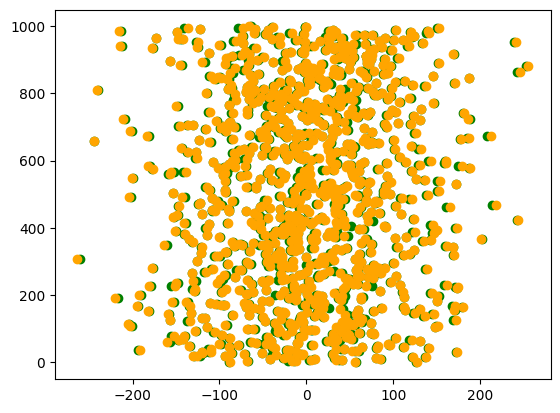

In [69]:
plt.scatter(y_pred , range(1000) , color = 'green')
plt.scatter(y_test , range(1000) , color = 'orange')
plt.show()
